**Random Forest**

In [1]:
%matplotlib inline

from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

import zipcodes as zcs

data = pd.read_csv('data.csv')
columns = list(data.head())
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


After the data is imported, we have to clean up the data.
There are some columns with values as zeros that has to be removed.
The location is represented as latitude,longitude and zip code. 
The street,city,statezip and country columns are removed. 
The data is scaled to get better sense of the values.

In [2]:
columns1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'floors', 'yr_built']
(n_rows,_) = data.shape
t = np.zeros(n_rows ) > 0
for col in columns1:
    temp = data[col] <= 0
    t = t | temp
    
data.drop( data[t].index, axis=0, inplace=True)   
(n_rows,_) = data.shape
data['zip'] = [x[3:] for x in data['statezip'] ]
data['location'] = [zcs.matching(x) for x in data['zip'] ]
data['lat'] = [x[0]['lat'] for x in data['location'] ]
data['long'] = [abs(x[0]['long']) for x in data['location'] ]
data = data[data.price < 2500000]
data.drop(['country','street','city','statezip','date','location'],axis=1,  inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zip,lat,long
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133,47.73,122.34
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119,47.63,122.37
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042,47.36,122.10
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008,47.60,122.11
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052,47.68,122.12


In [3]:
d = data.values
s = preprocessing.RobustScaler()
data_scaled = s.fit_transform(d)
df_scaled = pd.DataFrame(data_scaled, columns=list(data))
x_col = list(data)
x_col.remove('price')
# Set the target and feature variables as Y and X 
X = df_scaled[x_col]
Y = df_scaled['price']


Split the data into training and test set and set random state as 1. With the data lets perform Decision tree regressor. 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)  
dec_tree=regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print('Score of the prediction',score)

Score of the prediction 0.7512386145799289


The actual and predicted values are displayed ewlow.

In [6]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df 

,Actual,Predicted
2414,-0.288677,0.175328
1403,-0.523772,0.306355
3516,0.001069,0.015597
1351,-0.151285,-0.357374
1893,1.352403,0.981778
4221,0.010533,-0.004705
1832,0.592432,0.395199
3268,-0.572928,-0.664431
1960,-0.655058,-0.252345
3369,-0.360427,-0.479098


In [7]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R2:', metrics.r2_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
score = regressor.score(X_test, y_test)
print('Score of the prediction',score)

Mean Absolute Error: 0.30534558996933836
Mean Squared Error: 0.26328821586802914
Root Mean Squared Error: 0.5131161816470312
R2: 0.7512386145799289
Score of the prediction 0.7512386145799289


In [8]:
np.mean(Y)

0.22901929570988025

The $R^2$ is 0.75. It can be seen that the mean absolute error is 0.30. The model needs lots of improvement.

Let's plot validation curve to get the best max_Depth for validation curve.

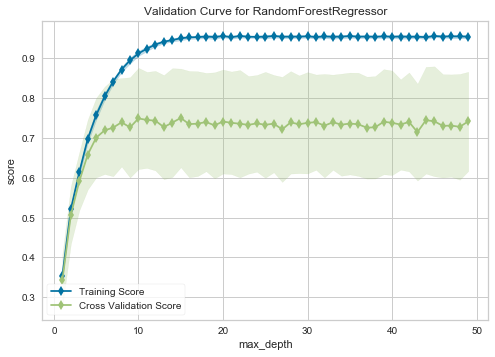

In [9]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 50), cv=10, scoring="r2"
)
viz.fit(X, Y)
viz.poof()

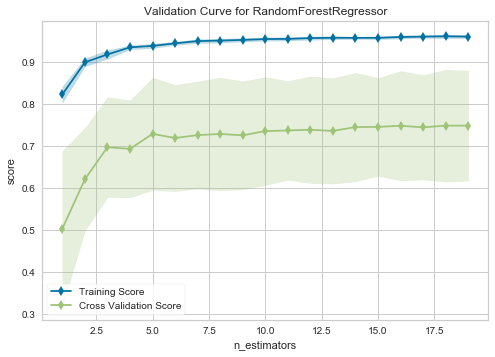

In [10]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    RandomForestRegressor(), param_name="n_estimators",
    param_range=np.arange(1, 20), cv=10, scoring="r2"
)
viz.fit(X, Y)
viz.poof()

From the validation curve looks like after 20 the max_depth doesn't change much so we can pick a max_depth value accordingly and n_estimators reaches a plateau after 20 see how our model behaves.

In [11]:
regressor = RandomForestRegressor(random_state = 0,max_depth=20,n_estimators=50)  
dec_tree=regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.770947648242886


The $R^2$ value now is  0.77 not much of an improvement from our earlier model. Let's try to perform 10fold-cross validation to see if we can improve the model.

In [12]:
decision_cv = RandomForestRegressor(max_depth=20,n_estimators=50)
#train model with cv of 5 
cv_scores = cross_val_score(decision_cv, X, Y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))\

[0.80278509 0.81603005 0.76860074 0.7929653  0.79446653 0.82310918
 0.79893513 0.7910097  0.80630525 0.3830539 ]
cv_scores mean:0.7577260862988624


In [ ]:
import scipy.stats as stats
print(r"95% CI for R^2:", stats.mstats.mquantiles(cv_scores, [0.025, 0.975]))

The 95% CI of $R^2$ is from 0.38 to 0.83.

In [ ]:
importances = dec_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature\t\tImportance")
print("--------------------------")
for ind in indices:
    print( "{:}\t{:0.3f}".format(list(X)[ind].ljust(9), importances[ind]))

It can be seen that sqft_living and lat is givem importance according to our model.